In [1]:
import os
os.chdir("/home/azureuser/cloudfiles/code/POC")
print(os.getcwd())

/mnt/batch/tasks/shared/LS_root/mounts/clusters/v-sukruthav1/code/POC


In [ ]:
# !uname -a 

In [3]:
# !sudo apt install tesseract-ocr -y


In [4]:
# !sudo apt install libtesseract-dev -y


In [5]:
# !sudo apt-get install poppler-utils -y

In [6]:
# ! pip install langchain unstructured[all-docs] pydantic lxml openai chromadb tiktoken opencv-python

In [7]:
# ! pip install unstructured[all-docs]

In [8]:
import os
import uuid
import base64
from IPython import display
from unstructured.partition.pdf import partition_pdf
from langchain.chat_models import ChatOpenAI
from langchain.embeddings import OpenAIEmbeddings
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.schema.messages import HumanMessage, SystemMessage
from langchain.schema.document import Document
# from langchain.vectorstores import FAISS
from langchain.retrievers.multi_vector import MultiVectorRetriever

/anaconda/envs/llm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
# import sys, pymupdf  # import the bindings
# fname = "/home/azureuser/cloudfiles/code/POC/Share MTS_07_m.pdf"#sys.argv[1]  # get filename from command line
# doc = pymupdf.open(fname)  # open document
# pages=0
# for page in doc:  # iterate through the pages
#     pages+=1
#     pix = page.get_pixmap()  # render page to an image
#     pix.save("pymupdf_lib_images/page-%i.png" % page.number)
# print(pages)

In [10]:
# import fitz  # PyMuPDF

# # Open the document
# doc = fitz.open(fname)
# # Create a text file to save all the extracted text
# all_text_filename = "./pymupdf_lib_images/all_text.txt"
# with open(all_text_filename, "w", encoding="utf-8") as all_text_file:
#     pass  # Create an empty file or clear the existing file

# # Iterate through the pages
# for page_num in range(len(doc)):
#     page = doc.load_page(page_num)
    
#     # Extract text
#     text = page.get_text()
#     print(f"Text on page {page_num + 1}:\n{text}\n")
    
#     # Save the text to the all_text file
#     with open(all_text_filename, "a", encoding="utf-8") as all_text_file:
#         all_text_file.write(f"Text on page {page_num + 1}:\n{text}\n\n")
  
#     # Extract images
#     image_list = page.get_images(full=True)
#     for img_index, img in enumerate(image_list):
#         xref = img[0]
#         base_image = doc.extract_image(xref)
#         image_bytes = base_image["image"]
#         image_ext = base_image["ext"]
#         image_filename = f"./pymupdf_lib_images/page-{page_num + 1}-img-{img_index + 1}.{image_ext}"
        
#         # Save the image
#         with open(image_filename, "wb") as image_file:
#             image_file.write(image_bytes)

In [11]:
# # [ for img in os.listdir("./pymupdf_lib_images") if img.endswith(".png"))
# image_count = len([img for img in os.listdir("./pymupdf_lib_images") if img.endswith(".png")])
# print(f"Total number of images: {image_count}")

In [12]:
raw_pdf_elements = partition_pdf(
    filename="./Share MTS_07_m.pdf",
    extract_images_in_pdf=True,
    # infer_table_structure=True,
    strategy="hi_res",
    # chunking_strategy="by_title",
    max_characters=4000,
    new_after_n_chars=3800,
    combine_text_under_n_chars=2000,
    extract_image_block_to_payload=False,
    extract_image_block_output_dir="./images",
)

In [13]:
raw_pdf_elements

In [14]:
from unstructured.documents.elements import NarrativeText
text_data = []
paragraph_counters={}


for element in raw_pdf_elements:
    if isinstance(element, NarrativeText):
        page_number = element.metadata.page_number

        if page_number not in paragraph_counters:
            paragraph_counters[page_number] = 1
        else:
            paragraph_counters[page_number] += 1

        paragraph_number = paragraph_counters[page_number]

        text_content = element.text
        text_data.append({
            "source_document": "./Share MTS_07_m.pdf",
            "page_number": page_number,
            # "paragraph_number": paragraph_number,
            "text": text_content
        })
# for text in text_data:
#     print(text['text'])
text_data

[{'source_document': './Share MTS_07_m.pdf',
  'page_number': 3,
  'text': 'Almost all materials have more than one phase in them.'},
 {'source_document': './Share MTS_07_m.pdf',
  'page_number': 3,
  'text': 'Thus engineering materials attain their special properties. Macroscopic basic unit of a material is called component. It refers to a independent chemical species. The components of a system may be elements, ions or compounds. A phase can be defined as a homogeneous portion of a system that has uniform physical and chemical characteristics i.e. it is a physically distinct from other phases, chemically homogeneous and mechanically separable portion of a system.'},
 {'source_document': './Share MTS_07_m.pdf',
  'page_number': 3,
  'text': 'A component can exist in many phases.'},
 {'source_document': './Share MTS_07_m.pdf',
  'page_number': 3,
  'text': 'E.g.: Water exists as ice, liquid water, and water vapor.'},
 {'source_document': './Share MTS_07_m.pdf',
  'page_number': 3,
  't

In [15]:
# text_data[1]['text']

In [16]:
from unstructured.documents.elements import Image
image_data = []

for element in raw_pdf_elements:
    if isinstance(element, Image):
        page_number = element.metadata.page_number
        image_path = element.metadata.image_path if hasattr(element.metadata, 'image_path') else None

        image_data.append({
            "source_document": "./Share MTS_07_m.pdf",
            "page_number": page_number,
            "image_path": image_path
        })

In [17]:
image_data

[{'source_document': './Share MTS_07_m.pdf',
  'page_number': 5,
  'image_path': './images/figure-5-1.jpg'},
 {'source_document': './Share MTS_07_m.pdf',
  'page_number': 5,
  'image_path': './images/figure-5-2.jpg'},
 {'source_document': './Share MTS_07_m.pdf',
  'page_number': 5,
  'image_path': './images/figure-5-3.jpg'},
 {'source_document': './Share MTS_07_m.pdf',
  'page_number': 5,
  'image_path': './images/figure-5-4.jpg'},
 {'source_document': './Share MTS_07_m.pdf',
  'page_number': 5,
  'image_path': './images/figure-5-5.jpg'},
 {'source_document': './Share MTS_07_m.pdf',
  'page_number': 5,
  'image_path': './images/figure-5-6.jpg'},
 {'source_document': './Share MTS_07_m.pdf',
  'page_number': 5,
  'image_path': './images/figure-5-7.jpg'},
 {'source_document': './Share MTS_07_m.pdf',
  'page_number': 8,
  'image_path': './images/figure-8-8.jpg'},
 {'source_document': './Share MTS_07_m.pdf',
  'page_number': 11,
  'image_path': './images/figure-11-9.jpg'},
 {'source_documen

In [59]:
import matplotlib.pyplot as plt
from PIL import Image
import math

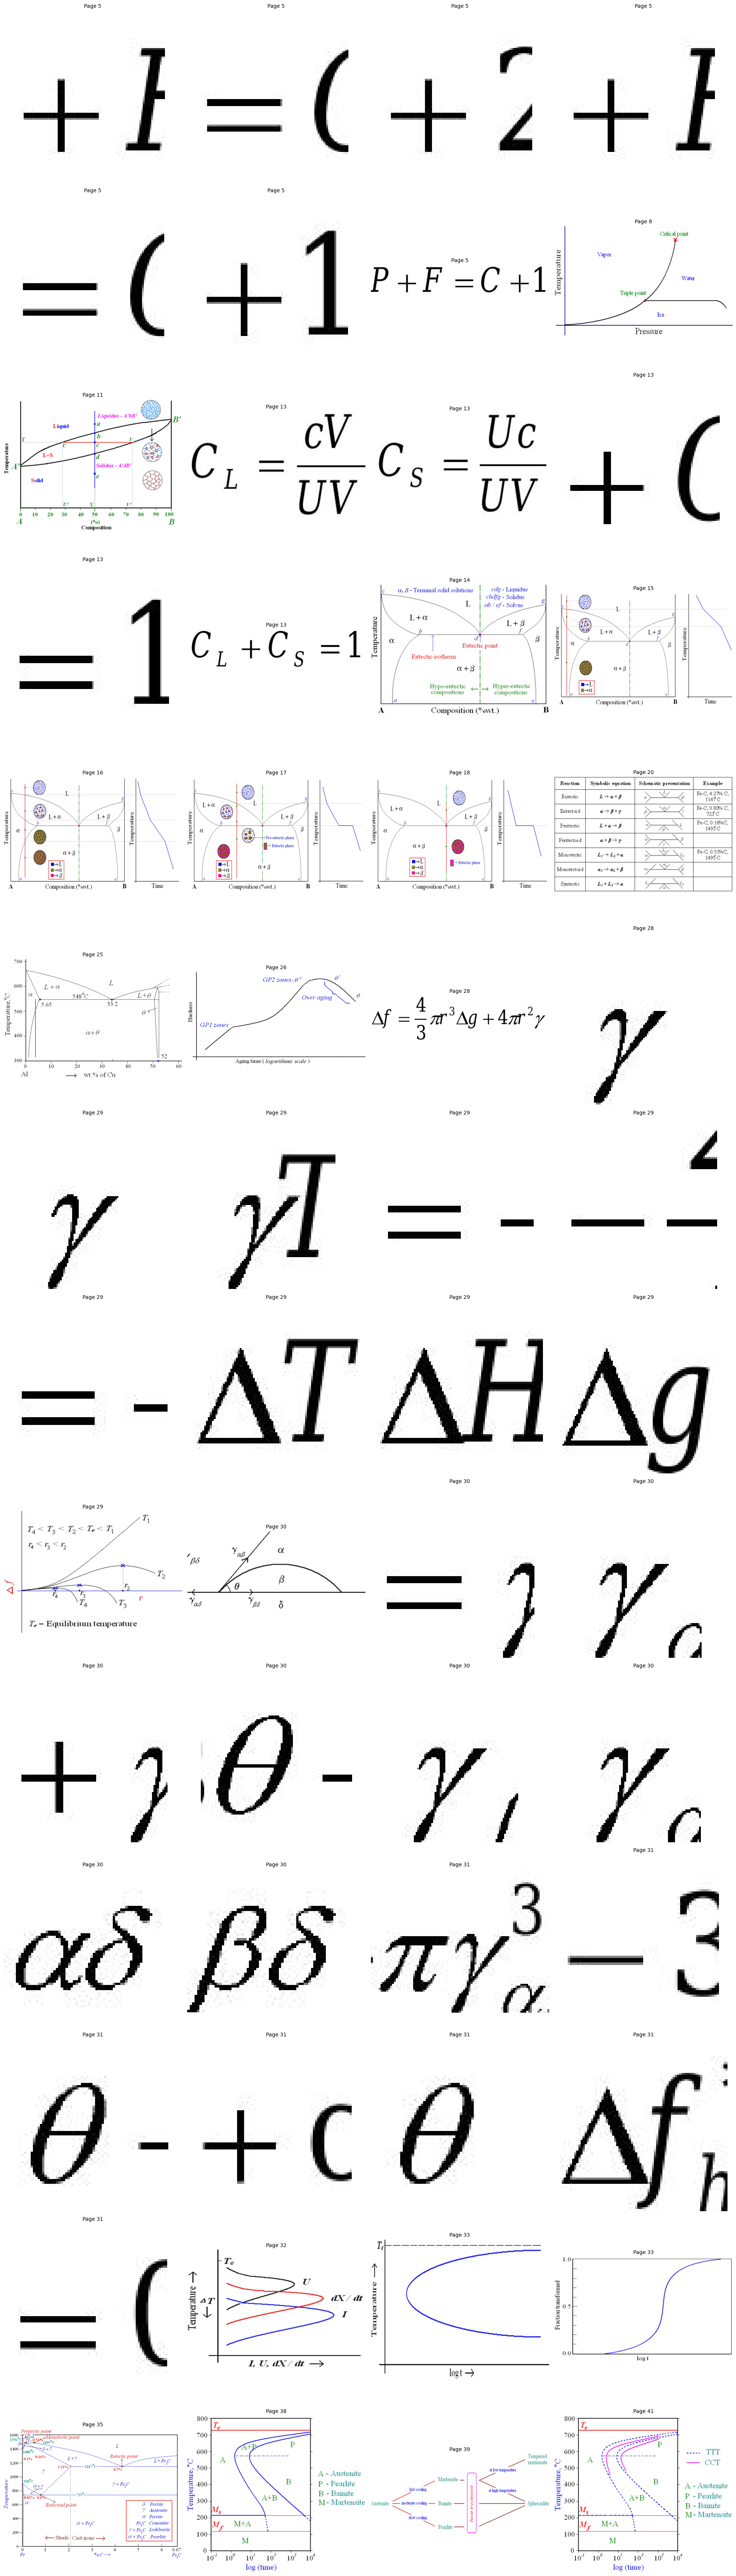

In [19]:
valid_images = [img for img in image_data if img['image_path']]
images_per_row = 4
if not valid_images:
    print("No valid image data available.")

num_images = len(valid_images)
num_rows = math.ceil(num_images / images_per_row)

fig, axes = plt.subplots(num_rows, images_per_row, figsize=(20, 5*num_rows))
axes = axes.flatten() if num_rows > 1 else [axes]

for ax, img_data in zip(axes, valid_images):
    try:
        img = Image.open(img_data['image_path'])
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"Page {img_data['page_number']}", fontsize=10)
    except Exception as e:
        print(f"Error loading image {img_data['image_path']}: {str(e)}")
        ax.text(0.5, 0.5, f"Error loading image\n{str(e)}", ha='center', va='center')
        ax.axis('off')

for ax in axes[num_images:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

In [20]:
from unstructured.documents.elements import Table
table_data = []

for element in raw_pdf_elements:
    if isinstance(element, Table):
        page_number = element.metadata.page_number
        print(page_number)

        # Extract table content as a string
        table_content = str(element)

        table_data.append({
            "source_document": "./Share MTS_07_m.pdf",
            "page_number": page_number,
            "table_content": table_content
        })
table_data

37


[{'source_document': './Share MTS_07_m.pdf',
  'page_number': 37,
  'table_content': 'Commercial pure irons % C < 0.008 Low-carbon/mild steels 0.008 - %C - 0.3 Medium carbon steels 0.3 - %C - 0.8 High-carbon steels 0.8- %C - 2.11'}]

In [21]:
# 

In [22]:

from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import AzureChatOpenAI

In [23]:
tables_summarizer_prompt = """
You are an advanced assistant designed to accurately summarize tabular data. 
Follow these guidelines:
 
1. **Understand the Content**: 
   Analyze the provided table data carefully, understand the content.

2. **Summarize the Table**: 
   - Provide a clear and detailed summary of the table content also avoid bullet points
   - Include key trends or patterns if explicitly present.
   - Do not infer or fabricate information.
 
Content:
{table_content}
 
Summary:
"""

In [24]:
azure_openai__model = AzureChatOpenAI(
    azure_endpoint="https://llm-application.openai.azure.com/",
    api_key="c0eff5bcc3fc47c5820c54d3b427e13f",
    azure_deployment="llm-gpt-4o",  
    api_version="2024-08-01-preview", 
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
 
)

In [25]:
print(azure_openai__model.predict(table_data[0]['table_content']))

/tmp/ipykernel_54371/767333880.py:1: LangChainDeprecationWarning: The method `BaseChatModel.predict` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use invoke instead.
  print(azure_openai__model.predict(table_data[0]['table_content']))


The classification of steels based on their carbon content is an important aspect of metallurgy, as the carbon content significantly influences the mechanical properties, weldability, and applications of the steel. Here's a breakdown of the categories you provided:

1. **Commercial Pure Irons**:  
   - **Carbon Content**: Less than 0.008% C  
   - **Characteristics**: Very soft, ductile, and highly malleable. These materials have excellent magnetic properties and are often used in electrical applications like transformers and motors.  
   - **Applications**: Electrical components, scientific instruments, and applications requiring high ductility and corrosion resistance.

2. **Low-Carbon/Mild Steels**:  
   - **Carbon Content**: 0.008% ≤ %C ≤ 0.3%  
   - **Characteristics**: Low strength but excellent ductility, weldability, and machinability. These steels are widely used due to their versatility and cost-effectiveness.  
   - **Applications**: Structural components, automotive body pa

In [26]:
table_data = []
prompt = ChatPromptTemplate.from_template(tables_summarizer_prompt)

for element in raw_pdf_elements:
    if isinstance(element, Table):
        page_number = element.metadata.page_number

        table_content = str(element)

        messages = prompt.format_messages(table_content=table_content)
        description = azure_openai__model.predict_messages(messages).content

        table_data.append({
            "source_document": "./Share MTS_07_m.pdf",
            "page_number": page_number,
            "table_content": table_content,
            "description": description
        })
print(table_data)

/tmp/ipykernel_54371/2847523365.py:11: LangChainDeprecationWarning: The method `BaseChatModel.predict_messages` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use invoke instead.
  description = azure_openai__model.predict_messages(messages).content


[{'source_document': './Share MTS_07_m.pdf', 'page_number': 37, 'table_content': 'Commercial pure irons % C < 0.008 Low-carbon/mild steels 0.008 - %C - 0.3 Medium carbon steels 0.3 - %C - 0.8 High-carbon steels 0.8- %C - 2.11', 'description': 'The table categorizes different types of iron and steel based on their carbon content. Commercial pure irons contain less than 0.008% carbon, making them the least carbon-rich category. Low-carbon or mild steels have a carbon content ranging from 0.008% to 0.3%, indicating a slightly higher carbon presence compared to pure iron. Medium-carbon steels are defined by a carbon content between 0.3% and 0.8%, representing a moderate level of carbon. High-carbon steels, which have the highest carbon content in this classification, range from 0.8% to 2.11%. This progression highlights a clear trend of increasing carbon content from pure iron to high-carbon steels, with corresponding changes in material properties typically associated with carbon levels.'

In [27]:
print(table_data[0]['description'])

The table categorizes different types of iron and steel based on their carbon content. Commercial pure irons contain less than 0.008% carbon, making them the least carbon-rich category. Low-carbon or mild steels have a carbon content ranging from 0.008% to 0.3%, indicating a slightly higher carbon presence compared to pure iron. Medium-carbon steels are defined by a carbon content between 0.3% and 0.8%, representing a moderate level of carbon. High-carbon steels, which have the highest carbon content in this classification, range from 0.8% to 2.11%. This progression highlights a clear trend of increasing carbon content from pure iron to high-carbon steels, with corresponding changes in material properties typically associated with carbon levels.


In [28]:
from PIL import Image as PILImage
import base64

In [29]:
images_summarizer_prompt = """
You are an advanced assistant specializing in image summarization also avoid the bullet points. Your task is to provide precise, accurate, and concise descriptions of the image without any hallucination.
 
Summary:
"""

In [30]:
image_data = []

# prompt = ChatPromptTemplate.from_template(images_summarizer_prompt)

# Create ChatOpenAI instance
# image_description_model = ChatOpenAI(model=model_ID)
from openai import AzureOpenAI
client = AzureOpenAI(  
    azure_endpoint="https://llm-application.openai.azure.com/",  
    api_key="c0eff5bcc3fc47c5820c54d3b427e13f",  
    api_version="2024-08-01-preview",  
)

for element in raw_pdf_elements:
    if "Image" in str(type(element)):
        page_number = element.metadata.page_number if hasattr(element.metadata, 'page_number') else None
        image_path = element.metadata.image_path if hasattr(element.metadata, 'image_path') else None

        if image_path and os.path.exists(image_path):
            # Generate description using the OpenAI model
            # messages = prompt.format_messages(image_element=image_path)
            encoded_image = base64.b64encode(open(image_path, 'rb').read()).decode('ascii')
 
            chat_prompt = [
                {
                    "role": "system",
                    "content": [
                        {
                            "type": "text",
                            "text": "You are an AI assistant that helps people find information."
                        }
                    ]
                },
                {
                    "role": "user",
                    "content": [
                        {
                            "type": "text",
                            "text": "\n"
                        },
                        {
                            "type": "image_url",
                            "image_url": {
                                "url": f"data:image/jpg;base64,{encoded_image}"
                            }
                        },
                        {
                            "type": "text",
                            # "text": "summarize the image in a detailed way"
                            "text": images_summarizer_prompt

                        }
                    ]
                }
            ]
    
            messages = chat_prompt  
            completion = client.chat.completions.create(  
                model="llm-gpt-4o",  
                messages=messages,  
                # max_tokens=800,  
                temperature=0,  
                # top_p=0.95,  
                # frequency_penalty=0,  
                # presence_penalty=0,  
                # stop=None,  
                # stream=False
            )
            description = completion.choices[0].message.content

            # Read the image file and encode it to base64
            with open(image_path, "rb") as image_file:
                encoded_string = base64.b64encode(image_file.read()).decode('utf-8')

            image_data.append({
                "source_document": "./Share MTS_07_m.pdf",
                "page_number": page_number,
                "image_path": image_path,
                "description": description,
                "base64_encoding": encoded_string
            })
        else:
            print(f"Warning: Image file not found or path not available for image on page {page_number}")

# image_data[-1].description

In [31]:
print(image_data[16]['description'])

The image illustrates a phase diagram (left) and a cooling curve (right). The phase diagram shows temperature versus composition for a binary alloy system, with regions labeled for liquid (L), solid phases (α and β), and their mixtures (L+α, L+β, α+β). Microstructural evolution is depicted at various stages, transitioning from liquid to solid phases as temperature decreases. The cooling curve on the right shows the temperature drop over time, corresponding to phase transitions in the diagram.


In [104]:
import weaviate

In [105]:
URL = "https://adtddr8esxaipnxjf00kxg.c0.asia-southeast1.gcp.weaviate.cloud"
APIKEY = "llx1fVZgBLJYgoK9Ecapp3Yox62ii9j62wfh"

In [106]:
client = weaviate.connect_to_wcs(
    cluster_url=URL,
    auth_credentials=weaviate.auth.AuthApiKey(APIKEY),
    headers = {
        "X-Azure-Api-Key": "c0eff5bcc3fc47c5820c54d3b427e13f"
    }
)

In [71]:
client.__dict__

{'_event_loop': <weaviate.event_loop._EventLoop at 0x7f9918d10820>,
 '_loop': <_UnixSelectorEventLoop running=True closed=False debug=False>,
 '_skip_init_checks': False,
 '_connection': <weaviate.connect.v4.ConnectionV4 at 0x7f98f045e470>,
 'integrations': <weaviate.integrations._Integrations at 0x7f98f045efb0>,
 'batch': <weaviate.collections.batch.client._BatchClientWrapper at 0x7f98f045da50>,
 'backup': <weaviate.backup.sync._Backup at 0x7f98f045d900>,
 'cluster': <weaviate.collections.cluster.sync._Cluster at 0x7f98f045d7e0>,
 'collections': <weaviate.collections.collections.sync._Collections at 0x7f98f045d8d0>}

In [72]:
# client.cluster.__dict__

In [92]:
import weaviate.classes.config as wc

properties = [
    wc.Property(name="source_document", data_type=wc.DataType.TEXT, skip_vectorization=True),
    wc.Property(name="page_number", data_type=wc.DataType.INT, skip_vectorization=True),
    # wc.Property(name="paragraph_number", data_type=wc.DataType.INT, skip_vectorization=True),
    wc.Property(name="text", data_type=wc.DataType.TEXT),
    wc.Property(name="image_path", data_type=wc.DataType.TEXT, skip_vectorization=True),
    wc.Property(name="description", data_type=wc.DataType.TEXT),
    wc.Property(name="base64_encoding", data_type=wc.DataType.BLOB, skip_vectorization=True),
    wc.Property(name="table_content", data_type=wc.DataType.TEXT),
    # wc.Property(name="url", data_type=wc.DataType.TEXT, skip_vectorization=True),
    # wc.Property(name="audio_path", data_type=wc.DataType.TEXT, skip_vectorization=True),
    # wc.Property(name="transcription", data_type=wc.DataType.TEXT),
    wc.Property(name="content_type", data_type=wc.DataType.TEXT, skip_vectorization=True),
]

In [74]:
# client.collections.create(
#     name="RAGEducationalGDocuments",
#     properties=properties,
#     vectorizer_config=None
# )

In [93]:
from weaviate.util import generate_uuid5
from tqdm import tqdm
from openai import AzureOpenAI
azure_openai_client = AzureOpenAI(  
    azure_endpoint="https://llm-application.openai.azure.com/",  
    api_key="c0eff5bcc3fc47c5820c54d3b427e13f",  
    api_version="2024-08-01-preview",  
)

In [76]:
response = azure_openai_client.embeddings.create(
        input=text_data[1]['text'],
        model="embedding_03large_model"
    )

In [77]:
len(response.data[0].embedding)

3072

In [78]:
response1 = azure_openai_client.embeddings.create(
        input=text_data[1]['text'],
        model="text-embedding-ada-002"
    )

In [79]:
len(response.data[0].embedding)

3072

In [94]:
def get_embedding(text):
    response = azure_openai_client.embeddings.create(
        input=text,
        model="embedding_03large_model"
    )
    return response.data[0].embedding

def ingest_audio_data(collection, audio_data):
    with collection.batch.dynamic() as batch:
        for audio in tqdm(audio_data, desc="Ingesting audio data"):
            vector = get_embedding(audio['transcription'])
            audio_obj = {
                "url": audio['url'],
                "audio_path": audio['audio_path'],
                "transcription": audio['transcription'],
                "content_type": "audio"
            }
            batch.add_object(
                properties=audio_obj,
                uuid=generate_uuid5(audio['url']),
                vector=vector
            )

def ingest_text_data(collection, text_data):
    with collection.batch.dynamic() as batch:
        for text in tqdm(text_data, desc="Ingesting text data"):
            vector = get_embedding(text['text'])
            text_obj = {
                "source_document": text['source_document'],
                "page_number": text['page_number'],
                # "paragraph_number": text['paragraph_number'],
                "text": text['text'],
                "content_type": "text"
            }
            batch.add_object(
                properties=text_obj,
                uuid=generate_uuid5(f"{text['source_document']}_{text['page_number']}"),
                vector=vector
            )

def ingest_image_data(collection, image_data):
    with collection.batch.dynamic() as batch:
        for image in tqdm(image_data, desc="Ingesting image data"):
            vector = get_embedding(image['description'])
            image_obj = {
                "source_document": image['source_document'],
                "page_number": image['page_number'],
                "image_path": image['image_path'],
                "description": image['description'],
                "base64_encoding": image['base64_encoding'],
                "content_type": "image"
            }
            batch.add_object(
                properties=image_obj,
                uuid=generate_uuid5(f"{image['source_document']}_{image['page_number']}_{image['image_path']}"),
                vector=vector
            )

def ingest_table_data(collection, table_data):
    with collection.batch.dynamic() as batch:
        for table in tqdm(table_data, desc="Ingesting table data"):
            vector = get_embedding(table['description'])
            table_obj = {
                "source_document": table['source_document'],
                "page_number": table['page_number'],
                "table_content": table['table_content'],
                "description": table['description'],
                "content_type": "table"
            }
            batch.add_object(
                properties=table_obj,
                uuid=generate_uuid5(f"{table['source_document']}_{table['page_number']}"),
                vector=vector
            )

def ingest_all_data(collection_name, text_data, image_data, table_data):

    collection = client.collections.get(collection_name)

    # ingest_audio_data(collection, audio_data)
    ingest_text_data(collection, text_data)
    ingest_image_data(collection, image_data)
    ingest_table_data(collection, table_data)

    if len(collection.batch.failed_objects) > 0:
        print(f"Failed to import {len(collection.batch.failed_objects)} objects")
    else:
        print("All objects imported successfully")

In [46]:
# text_data[0],image_data[0],table_data[0]

In [68]:
ingest_all_data(collection_name="RAGEducationalGDocuments",
                # audio_data=audio_data,
                text_data=text_data,
                image_data=image_data,
                table_data=table_data)
            

Ingesting text data:   0%|                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | 0/51 [00:00<?, ?it/s]

Ingesting table data: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.42it/s]

All objects imported successfully


In [81]:
collection = client.collections.get("RAGEducationalGDocuments")
try:
    first_item = next(collection.iterator(include_vector=True))
    print(first_item.properties)
    print(first_item.vector)
except StopIteration:
    print("The collection is empty.")

{'text': None, 'description': 'The image depicts a graph showing the relationship between a variable \\( \\Delta f \\) and \\( r \\), with curves corresponding to different temperatures \\( T_1, T_2, T_3, T_4 \\), where \\( T_4 < T_3 < T_2 < T_1 < T_e \\) (equilibrium temperature). The graph illustrates that as temperature decreases, the curves shift downward, and the corresponding radii \\( r_4 < r_3 < r_2 \\). The equilibrium points are marked on the curves, indicating stability or instability at specific radii.', 'image_path': './images/figure-29-33.jpg', 'page_number': 29, 'table_content': None, 'content_type': 'image', 'source_document': './Share MTS_07_m.pdf'}
{'default': [0.001548721338622272, -0.036254242062568665, -0.017183000221848488, 0.008388150483369827, -0.014241700060665607, -0.0017566095339134336, 0.0072152623906731606, 0.030095668509602547, -0.011394812725484371, -0.008097652345895767, -0.028919149190187454, 0.027713578194379807, -0.049181435257196426, -0.0245180930942

In [95]:
import weaviate.classes.query as wq

In [119]:
def search_multimodal(query: str, limit: int = 3):
    query_vector = get_embedding(query)

    esg_documents = client.collections.get("RAGEducationalGDocuments")

    response = esg_documents.query.near_vector(
        near_vector=query_vector,
        limit=limit,
        return_metadata=wq.MetadataQuery(distance=True,score=True),
        return_properties=[
            "content_type", "source_document", "page_number", "text",
            "image_path", "description", "table_content"
        ]
    )

    return response.objects

In [124]:
def search_and_print_results(query, limit=3):

    search_results = search_multimodal(query, limit)

    print(f"Search Results for query: '{query}'")
    for item in search_results:
        print(f"Type: {item.properties['content_type']}")
        if item.properties['content_type'] == 'audio':
            print(f"URL: {item.properties['url']}")
            print(f"Transcription: {item.properties['transcription'][:100]}...")
        elif item.properties['content_type'] == 'text':
            print(f"Source: {item.properties['source_document']}, Page: {item.properties['page_number']}")
            # print(f"Paragraph {item.properties['paragraph_number']}")
            print(f"Text: {item.properties['text'][:100]}...")
        elif item.properties['content_type'] == 'image':
            print(f"Source: {item.properties['source_document']}, Page: {item.properties['page_number']}")
            print(f"Description: {item.properties['description']}")
            print(f"image_path: {item.properties['image_path']}")
            img = Image.open(item.properties['image_path'])
            plt.imshow(img)
            plt.axis('off')
            plt.show()
        elif item.properties['content_type'] == 'table':
            print(f"Source: {item.properties['source_document']}, Page: {item.properties['page_number']}")
            print(f"Description: {item.properties['description']}")
        print(f"Distance to query: {item.metadata.distance:.3f}")
        print(f"Score to query: {item.metadata.score:.3f}")
        print("---"*50)

Search Results for query: 'What is unary phase diagram?'
Type: text
Source: ./Share MTS_07_m.pdf, Page: 8
Text: If a system consists of just one component (e.g.: water), equilibrium of phases exist is depicted by...
Distance to query: 0.333
Score to query: 0.000
------------------------------------------------------------------------------------------------------------------------------------------------------
Type: image
Source: ./Share MTS_07_m.pdf, Page: 11
Description: The image depicts a binary phase diagram showing the relationship between temperature and composition for a two-component system (A and B). It includes three regions: a liquid phase (above the liquidus curve), a solid phase (below the solidus curve), and a two-phase region (liquid + solid) between the liquidus and solidus curves. The diagram highlights specific points and lines, such as the liquidus (A'bB') and solidus (A'dB') curves, and marks compositions (e.g., U, X, V) with corresponding microstructural represent

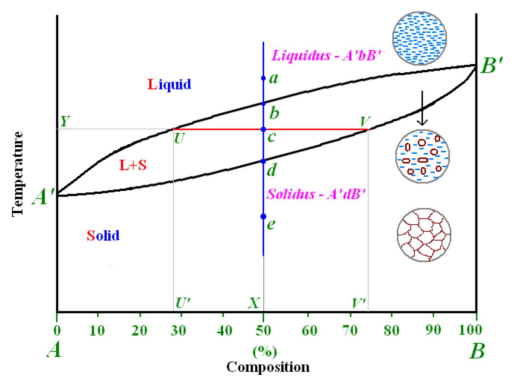

Distance to query: 0.421
Score to query: 0.000
------------------------------------------------------------------------------------------------------------------------------------------------------
Type: image
Source: ./Share MTS_07_m.pdf, Page: 15
Description: The image shows a phase diagram on the left, depicting temperature versus composition (% weight) for a binary alloy system. It includes regions for liquid (L), solid phases (α and β), and their mixtures (L+α, L+β, α+β). Key points and phase boundaries are labeled (e.g., a, b, c, d, f, g). Microstructural representations illustrate phase transitions at different compositions and temperatures. On the right, a cooling curve shows temperature decreasing over time, corresponding to phase changes in the system.
image_path: ./images/figure-15-16.jpg


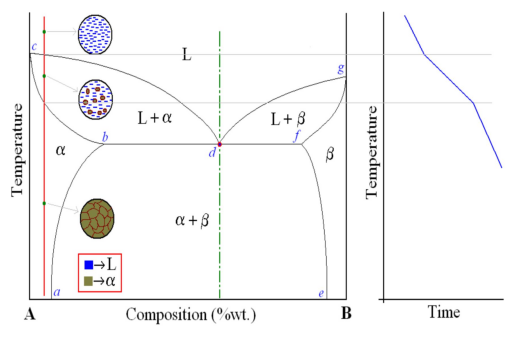

Distance to query: 0.465
Score to query: 0.000
------------------------------------------------------------------------------------------------------------------------------------------------------


In [125]:
query = "What is unary phase diagram?"
search_and_print_results(query)

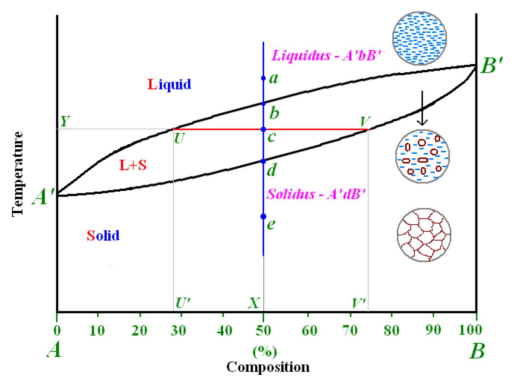

In [101]:
img = Image.open("./images/figure-11-9.jpg")

plt.imshow(img)
plt.axis('off')
plt.show()